In [86]:
import pandas as pd

# Carregar os dados
exportacao_vinho_quantidade = pd.read_excel('exportacao_vinho_quantidade.xlsx')
exportacao_vinho_valor = pd.read_excel('exportacao_vinho_valor.xlsx')
dados_demograficos = pd.read_excel('dados_demograficos.xlsx')

# Vamos ter certeza que os dados foram carregados corretamente
print(exportacao_vinho_quantidade.head())
print(exportacao_vinho_valor.head())
print(dados_demograficos.head())


   Id               País   2007   2008   2009   2010   2011  2012  2013  \
0   1        Afeganistão      0      0      0      0      0     0     0   
1   2      África do Sul      0      0      0      0      0     0     0   
2   4             Angola  25931  25721  54786  33557  13889  2833  1573   
3   6  Antígua e Barbuda      0      0      0      0      0     0     0   
4   8          Argentina      0      0    162      0  13253     0     0   

    2014  2015  2016   2017   2018  2019  2020  2021     Average   Total  
0      0     0     0      0      0     0     0    11      0.6875      11  
1      0     0     0      0      0    26     4     0      1.8750      30  
2  12182  1908  7359  10170    477   345     0     0  12156.0625  194497  
3      0     0     0      0     37   219   624   805    105.3125    1685  
4  20385     0     0      0  15711     0  1015     6   3158.2500   50532  
   Id               País   2007   2008   2009    2010   2011  2012  2013  \
0   1        Afeganistã

In [88]:
# Selecionar os 10 países com maior volume de importação
top_10_import = exportacao_vinho_quantidade.nlargest(10, 'Total')
# Selecionar os 10 países com menor volume de exportação, excluindo o Brasil
bottom_10_import = exportacao_vinho_valor[exportacao_vinho_valor['País'] != 'Brasil'].nsmallest(10, 'Total')


# Agora vamos imprimir para garantir que tudo está correto
print(top_10_import)
print(bottom_10_import)


     Id            País     2007     2008      2009    2010    2011     2012  \
86  102          Rússia   266400  6207658  21912914       0       0  4528176   
79   94        Paraguai  1285459  2191901    486927  510989  240168   354824   
39   48  Estados Unidos   479269   443895    372319  228968  306787   146585   
24   29           China     7638     8689   1553416     795   54156    87905   
38   47         Espanha        0     2942      2181       0    5206        0   
61   74           Japão   357943   232293    217974  112178  100835    29281   
77   92   Países Baixos   181046   340412    171654   87368  125414   134879   
84  100     Reino Unido    84613   100097     30092  123624  122629    82937   
51   61           Haiti        0       20      4500    2700       0        0   
82   98        Portugal   109074    49090    141000    4577      95    47172   

       2013    2014    2015    2016     2017     2018     2019     2020  \
86  5893291  190656   47664       0        0

In [89]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Agora vamos filtrar para apenas a série "GDP per capita (current US$)"
gdp_per_capita = demographics_filtered[demographics_filtered['Series Name'] == 'GDP per capita (current US$)']


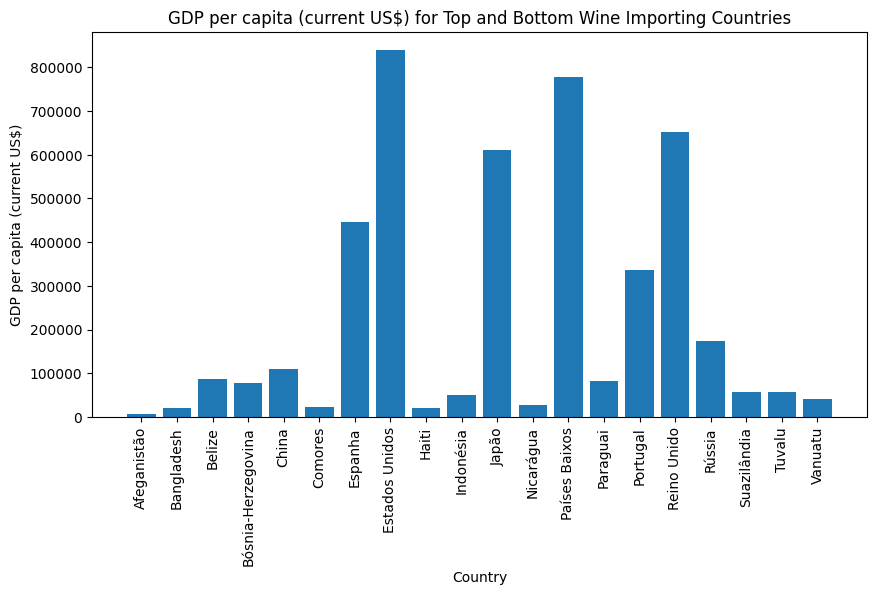

In [90]:
import matplotlib.pyplot as plt

# Gerar um gráfico de barras dos dados
plt.figure(figsize=(10, 5))
plt.bar(gdp_per_capita['País'], gdp_per_capita['Total'])
plt.title('GDP per capita (current US$) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('GDP per capita (current US$)')
plt.xticks(rotation=90) # isso é para girar os nomes dos países, já que eles podem ser longos
plt.show()


In [91]:
# Adicionar uma nova coluna ao dataframe
gdp_per_capita['Group'] = ['Top 10 Importers' if country in top_10_import['País'].values else 'Bottom 10 Importers' for country in gdp_per_capita['País']]


<ipython-input-91-cfab000fa728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita['Group'] = ['Top 10 Importers' if country in top_10_import['País'].values else 'Bottom 10 Importers' for country in gdp_per_capita['País']]


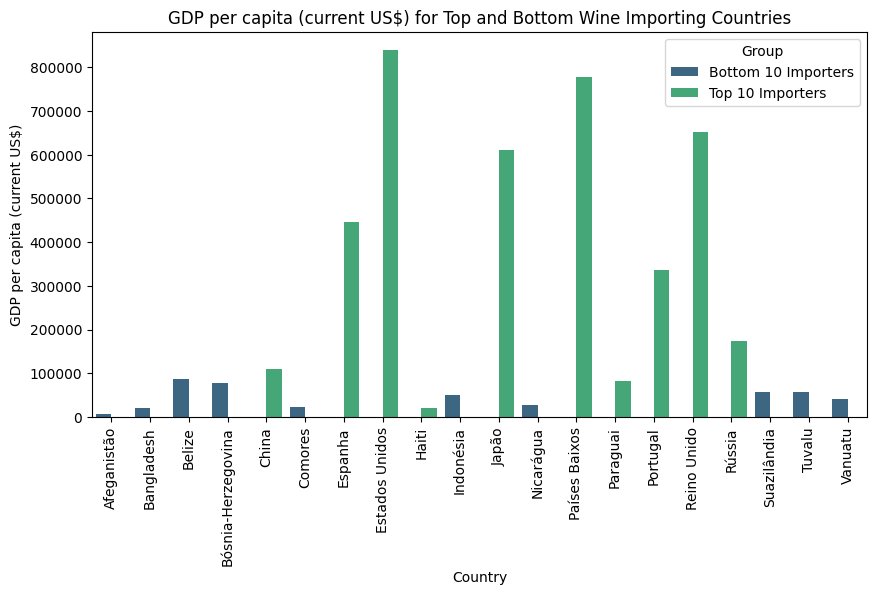

In [92]:
import seaborn as sns

plt.figure(figsize=(10, 5))

# Usar seaborn para criar o gráfico de barras, porque ele facilita a coloração baseada em uma variável
sns.barplot(x='País', y='Total', hue='Group', data=gdp_per_capita, palette='viridis')

plt.title('GDP per capita (current US$) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('GDP per capita (current US$)')
plt.xticks(rotation=90) # isso é para girar os nomes dos países, já que eles podem ser longos
plt.show()


<ipython-input-94-b1629b879389>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_gdp['Group'] = 'Top 10 Importers'
<ipython-input-94-b1629b879389>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_gdp['Group'] = 'Bottom 10 Importers'


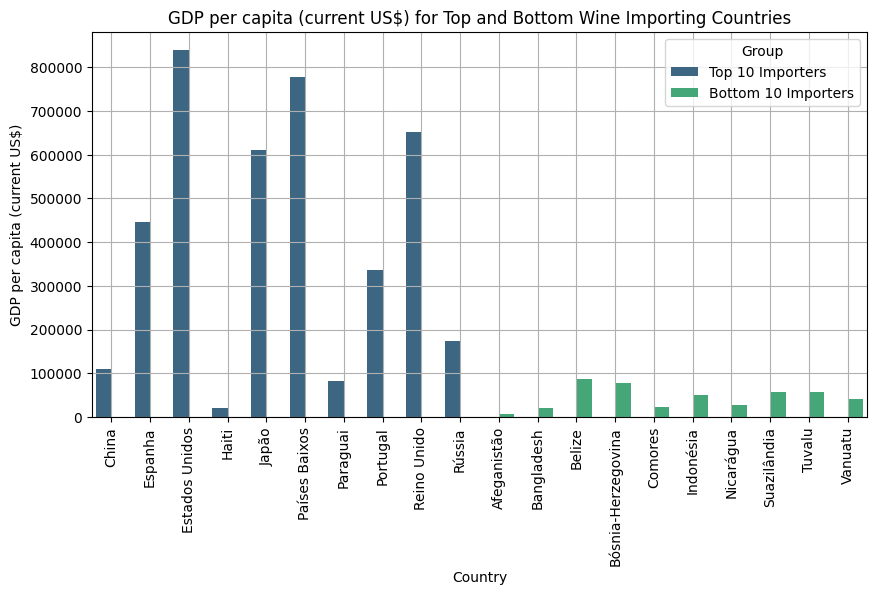

In [94]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
top_10_demographics = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País'])]
bottom_10_demographics = dados_demograficos[dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "GDP per capita (current US$)"
top_10_gdp = top_10_demographics[top_10_demographics['Series Name'] == 'GDP per capita (current US$)']
bottom_10_gdp = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'GDP per capita (current US$)']

# Adicionar uma nova coluna ao dataframe
top_10_gdp['Group'] = 'Top 10 Importers'
bottom_10_gdp['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
gdp_per_capita = pd.concat([top_10_gdp, bottom_10_gdp])

# Agora vamos gerar o gráfico novamente
plt.figure(figsize=(10, 5))

# Usar seaborn para criar o gráfico de barras, porque ele facilita a coloração baseada em uma variável
sns.barplot(x='País', y='Total', hue='Group', data=gdp_per_capita, palette='viridis')

plt.title('GDP per capita (current US$) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('GDP per capita (current US$)')
plt.xticks(rotation=90) # isso é para girar os nomes dos países, já que eles podem ser longos
plt.grid(True)  # Aqui estamos ativando o grid
plt.show()


In [54]:
top_10_import_sorted = top_10_import.sort_values(by='Total', ascending=False)
top_10_import_sorted

,Id,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average,Total
86,102,Rússia,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,2.472772e+06,39564353
79,94,Paraguai,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,1.710667e+06,27370665
39,48,Estados Unidos,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,2.634276e+05,4214841
24,29,China,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,1.507313e+05,2411701
38,47,Espanha,0,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,1.245625e+05,1993000
61,74,Japão,357943,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621,36442,39491,1.142089e+05,1827342
77,92,Países Baixos,181046,340412,171654,87368,125414,134879,57792,165289,44987,42953,0,9451,44882,248,3791,8.816356e+04,1410617
84,100,Reino Unido,84613,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,8.397562e+04,1343610
51,61,Haiti,0,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,7.738125e+04,1238100
82,98,Portugal,109074,49090,141000,4577,95,47172,23810,71544,47736,0,0,0,18328,7958,6358,3.402962e+04,544474


In [96]:
bottom_10_import_sorted = bottom_10_import.sort_values(by='Total', ascending=False)
bottom_10_import_sorted

,Id,País,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average,Total
16,20,Bósnia-Herzegovina,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,3.2500,52
9,13,Bangladesh,0,0,0,0,0,0,0,0,0,0,0,0,0,29,20,3.0625,49
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,2.8750,46
100,122,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,1.9375,31
13,17,Belize,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,1.8125,29
28,33,Comores,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,1.5625,25
72,87,Nicarágua,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1.5000,24
90,108,Suazilândia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,1.5000,24
57,68,Indonésia,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0.3750,6
98,120,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0.2500,4


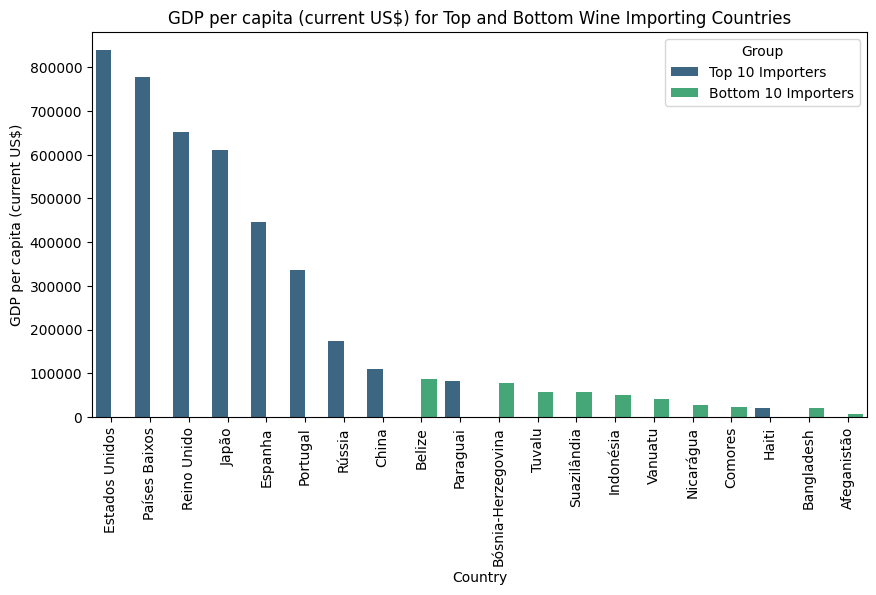

In [97]:
# Ordenar o dataframe por 'Total' em ordem decrescente
gdp_per_capita_sorted = gdp_per_capita.sort_values(by='Total', ascending=False)

# Gerar o gráfico
plt.figure(figsize=(10, 5))

sns.barplot(x='País', y='Total', hue='Group', data=gdp_per_capita_sorted, palette='viridis')

plt.title('GDP per capita (current US$) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('GDP per capita (current US$)')
plt.xticks(rotation=90)
plt.show()


In [98]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Agora vamos filtrar para apenas a série "GDP per capita (current US$)"
alcohol_consumption = demographics_filtered[demographics_filtered['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']

<ipython-input-100-d5f3a4b23ac6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_alcohol['Group'] = 'Top 10 Importers'
<ipython-input-100-d5f3a4b23ac6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_alcohol['Group'] = 'Bottom 10 Importers'


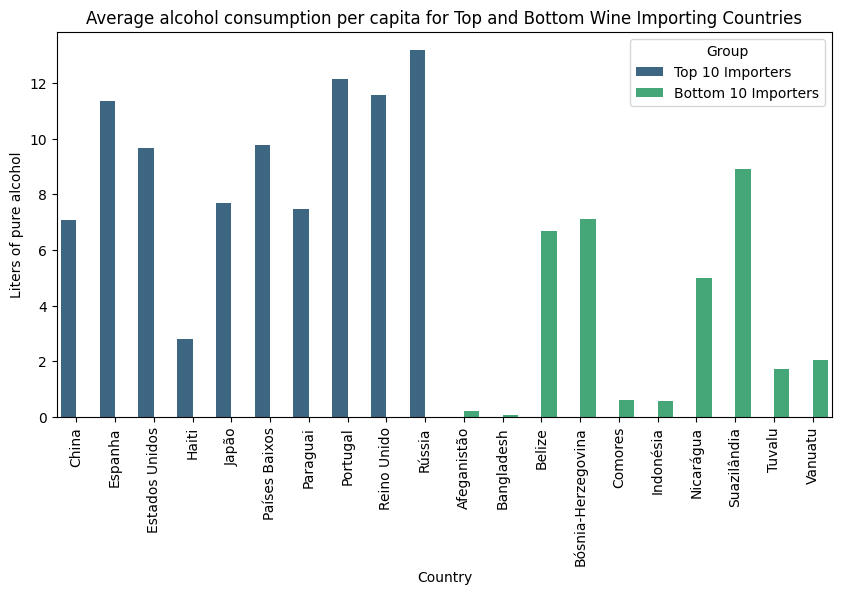

In [100]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
top_10_demographics = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País'])]
bottom_10_demographics = dados_demograficos[dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "GDP per capita (current US$)"
top_10_alcohol = top_10_demographics[top_10_demographics['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']
bottom_10_alcohol = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']

# Adicionar uma nova coluna ao dataframe
top_10_alcohol['Group'] = 'Top 10 Importers'
bottom_10_alcohol['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
alcohol_per_capita = pd.concat([top_10_alcohol, bottom_10_alcohol])

# Agora vamos gerar o gráfico novamente
plt.figure(figsize=(10, 5))

# Usar seaborn para criar o gráfico de barras, porque ele facilita a coloração baseada em uma variável
sns.barplot(x='País', y='Average', hue='Group', data=alcohol_per_capita, palette='viridis')

plt.title('Average alcohol consumption per capita for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Liters of pure alcohol')
plt.xticks(rotation=90) # isso é para girar os nomes dos países, já que eles podem ser longos
plt.show()


<ipython-input-101-b1b7532477e8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_alcohol_male['Group'] = 'Top 10 Importers'
<ipython-input-101-b1b7532477e8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_alcohol_male['Group'] = 'Bottom 10 Importers'


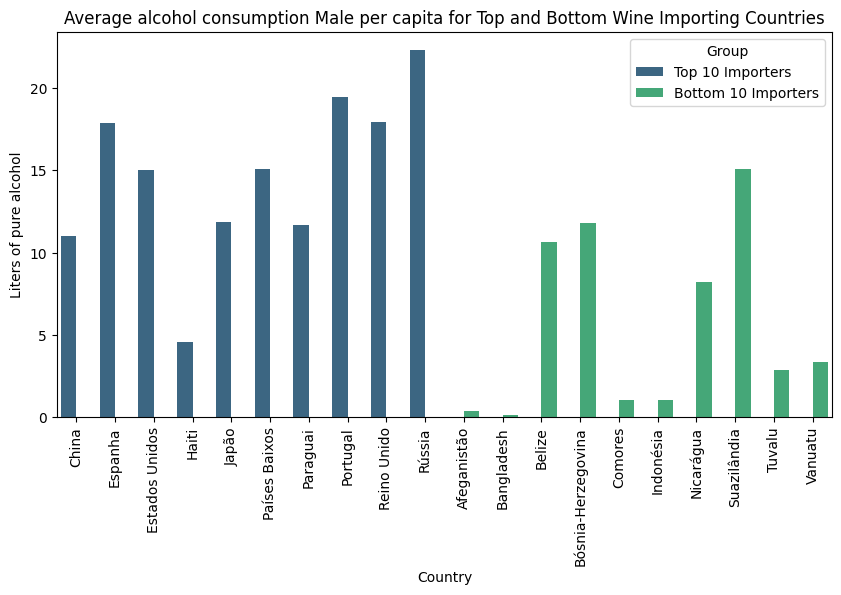

In [101]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
top_10_demographics = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País'])]
bottom_10_demographics = dados_demograficos[dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "GDP per capita (current US$)"
top_10_alcohol_male = top_10_demographics[top_10_demographics['Series Name'] == 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)']
bottom_10_alcohol_male = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)']

# Adicionar uma nova coluna ao dataframe
top_10_alcohol_male['Group'] = 'Top 10 Importers'
bottom_10_alcohol_male['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
alcohol_per_capita_male = pd.concat([top_10_alcohol_male, bottom_10_alcohol_male])

# Agora vamos gerar o gráfico novamente
plt.figure(figsize=(10, 5))

# Usar seaborn para criar o gráfico de barras, porque ele facilita a coloração baseada em uma variável
sns.barplot(x='País', y='Average', hue='Group', data=alcohol_per_capita_male, palette='viridis')

plt.title('Average alcohol consumption Male per capita for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Liters of pure alcohol')
plt.xticks(rotation=90) # isso é para girar os nomes dos países, já que eles podem ser longos
plt.show()


<ipython-input-102-e69a042ba1b2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_alcohol_female['Group'] = 'Top 10 Importers'
<ipython-input-102-e69a042ba1b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_alcohol_female['Group'] = 'Bottom 10 Importers'


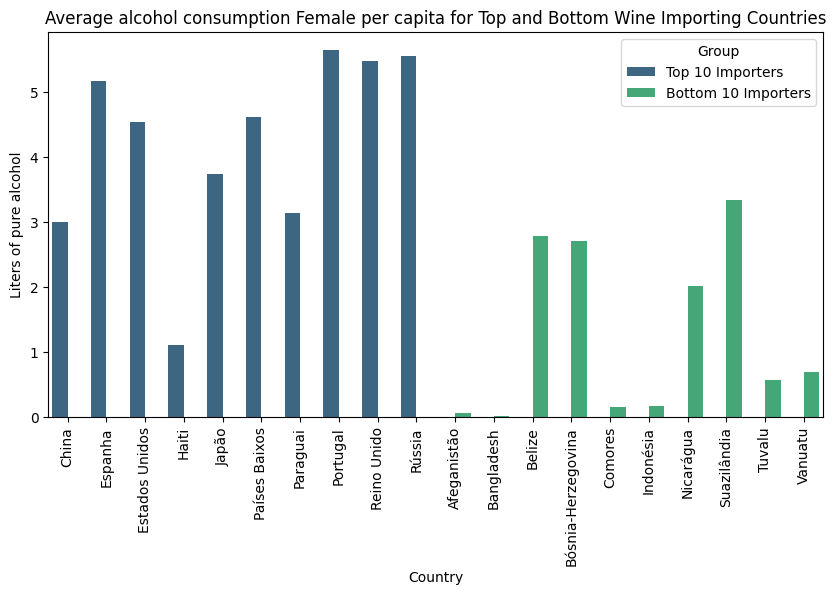

In [102]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
top_10_demographics = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País'])]
bottom_10_demographics = dados_demograficos[dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "GDP per capita (current US$)"
top_10_alcohol_female = top_10_demographics[top_10_demographics['Series Name'] == 'Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)']
bottom_10_alcohol_female = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)']

# Adicionar uma nova coluna ao dataframe
top_10_alcohol_female['Group'] = 'Top 10 Importers'
bottom_10_alcohol_female['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
alcohol_per_capita_female = pd.concat([top_10_alcohol_female, bottom_10_alcohol_female])

# Agora vamos gerar o gráfico novamente
plt.figure(figsize=(10, 5))

# Usar seaborn para criar o gráfico de barras, porque ele facilita a coloração baseada em uma variável
sns.barplot(x='País', y='Average', hue='Group', data=alcohol_per_capita_female, palette='viridis')

plt.title('Average alcohol consumption Female per capita for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Liters of pure alcohol')
plt.xticks(rotation=90) # isso é para girar os nomes dos países, já que eles podem ser longos
plt.show()


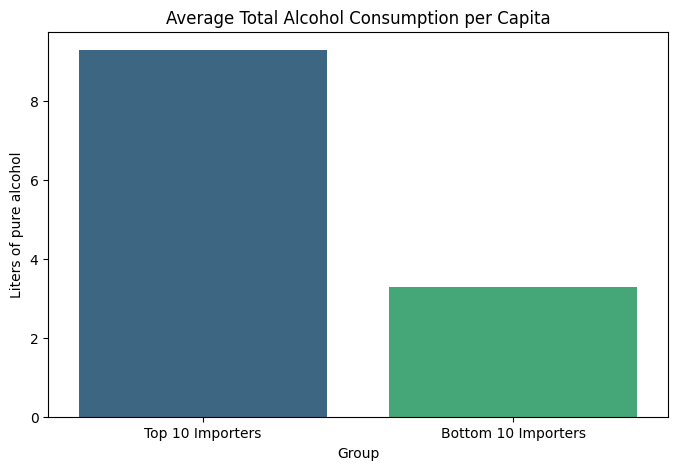

In [104]:
# Calcular a média total para o grupo "top_10_import"
top_10_import_mean = top_10_alcohol['Average'].mean()

# Calcular a média total para o grupo "bottom_10_export"
bottom_10_export_mean = bottom_10_alcohol['Average'].mean()

# Criar um DataFrame com as médias
mean_data = pd.DataFrame({'Group': ['Top 10 Importers', 'Bottom 10 Importers'],
                          'Mean': [top_10_import_mean, bottom_10_export_mean]})

# Gerar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Mean', data=mean_data, palette='viridis')
plt.title('Average Total Alcohol Consumption per Capita')
plt.xlabel('Group')
plt.ylabel('Liters of pure alcohol')
plt.show()


<ipython-input-106-29b29e876df4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_population['Group'] = 'Top 10 Importers'
<ipython-input-106-29b29e876df4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_population['Group'] = 'Bottom 10 Exporters'


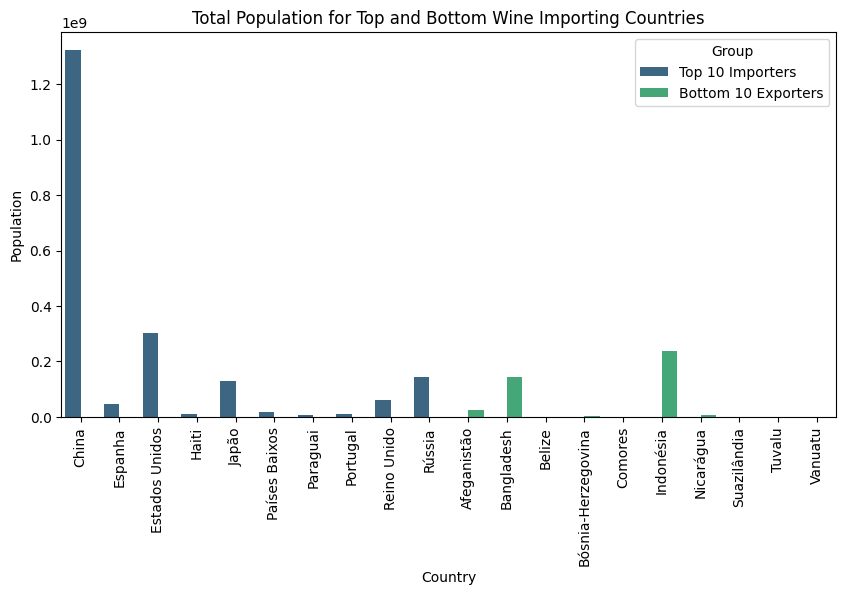

In [106]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "Population, total"
population_total = demographics_filtered[demographics_filtered['Series Name'] == 'Population, total']

# Filtrar para apenas os países do top 10 importadores e bottom 10 exportadores
top_10_population = population_total[population_total['País'].isin(top_10_import['País'])]
bottom_10_population = population_total[population_total['País'].isin(bottom_10_import['País'])]

# Adicionar uma nova coluna ao dataframe
top_10_population['Group'] = 'Top 10 Importers'
bottom_10_population['Group'] = 'Bottom 10 Exporters'

# Concatenar os dois dataframes
population_data = pd.concat([top_10_population, bottom_10_population])

# Gerar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x='País', y='Average', hue='Group', data=population_data, palette='viridis')
plt.title('Total Population for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.show()


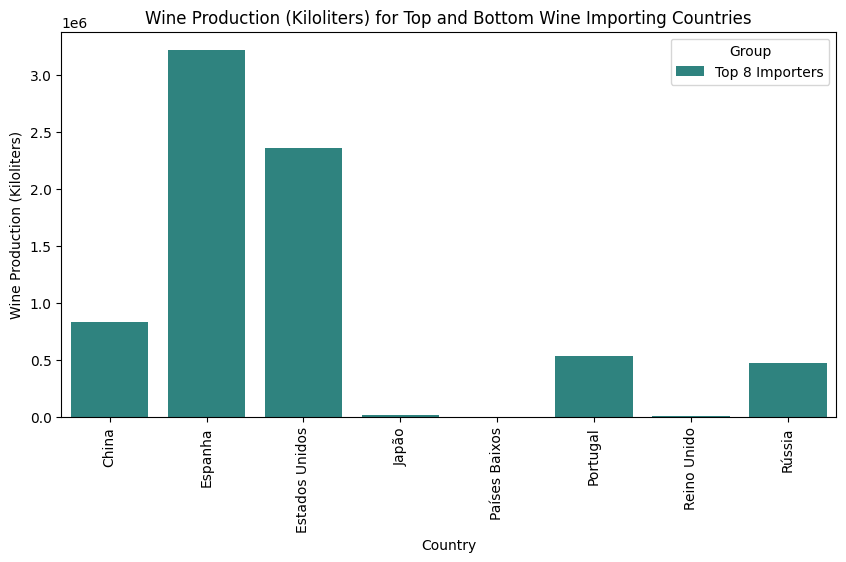

In [109]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "Wine production (Kiloliters)"
wine_production = demographics_filtered[demographics_filtered['Series Name'] == 'Wine production (Kiloliters)']

# Filtrar para apenas os países do top 10 importadores e bottom 10 exportadores
top_10_wine_production = wine_production[wine_production['País'].isin(top_10_import['País'])]
bottom_10_wine_production = wine_production[wine_production['País'].isin(bottom_10_export['País'])]

# Adicionar uma nova coluna ao dataframe
top_10_wine_production['Group'] = 'Top 8 Importers'
bottom_10_wine_production['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
wine_production_data = pd.concat([top_10_wine_production, bottom_10_wine_production])

# Gerar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x='País', y='Average', hue='Group', data=wine_production_data, palette='viridis')
plt.title('Wine Production (Kiloliters) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Wine Production (Kiloliters)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-111-23240b642e64>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_grape_production['Group'] = 'Top 10 Importers'
<ipython-input-111-23240b642e64>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_grape_production['Group'] = 'Bottom 10 Importers'


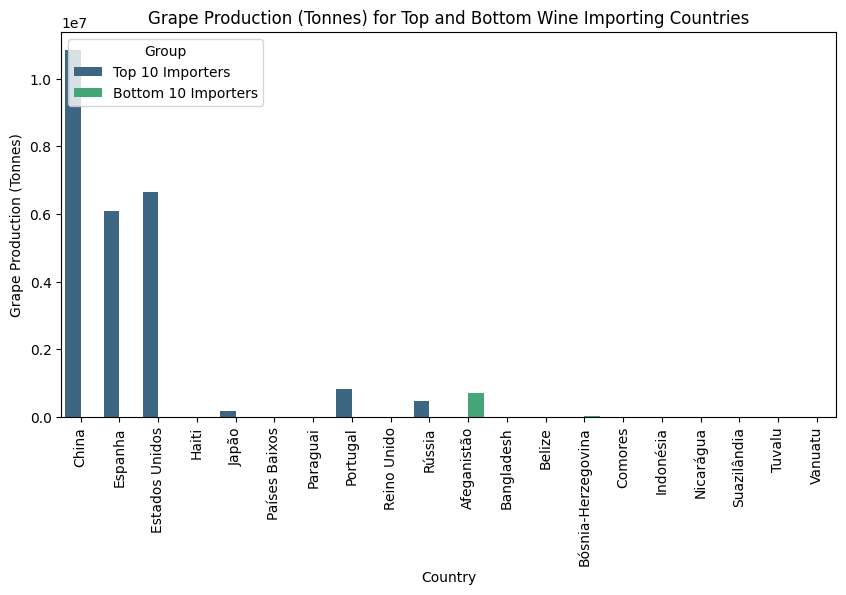

In [111]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "Grape production tonnes"
grape_production = demographics_filtered[demographics_filtered['Series Name'] == 'Grape production tonnes']

# Filtrar para apenas os países do top 10 importadores e bottom 10 exportadores
top_10_grape_production = grape_production[grape_production['País'].isin(top_10_import['País'])]
bottom_10_grape_production = grape_production[grape_production['País'].isin(bottom_10_export['País'])]

# Adicionar uma nova coluna ao dataframe
top_10_grape_production['Group'] = 'Top 10 Importers'
bottom_10_grape_production['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
grape_production_data = pd.concat([top_10_grape_production, bottom_10_grape_production])

# Gerar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x='País', y='Average', hue='Group', data=grape_production_data, palette='viridis')
plt.title('Grape Production (Tonnes) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Grape Production (Tonnes)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-116-360f0713bb04>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_food_imports['Group'] = 'Top 10 Importers'
<ipython-input-116-360f0713bb04>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_food_imports['Group'] = 'Bottom 10 Importers'


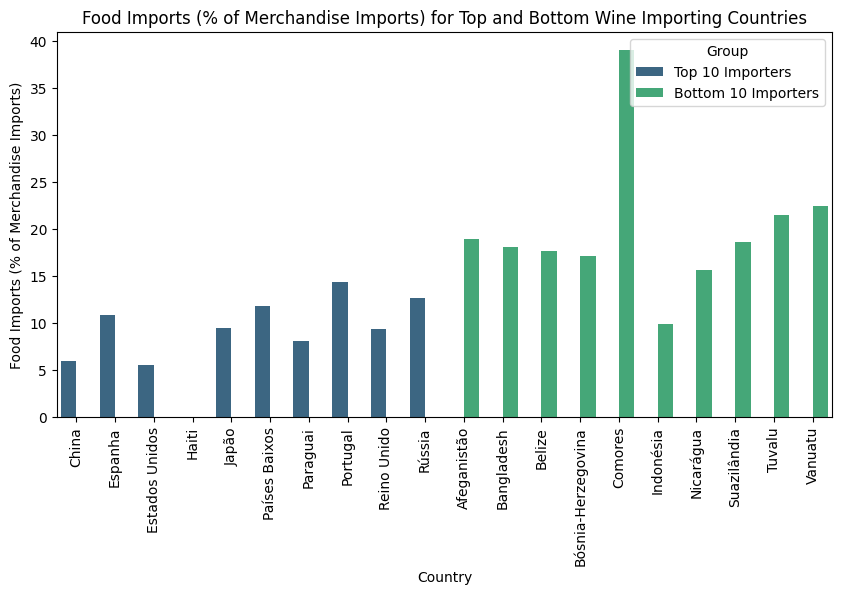

In [116]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "Food imports (% of merchandise imports)"
food_imports = demographics_filtered[demographics_filtered['Series Name'] == 'Food imports (% of merchandise imports)']

# Filtrar para apenas os países do top 10 importadores e bottom 10 exportadores
top_10_food_imports = food_imports[food_imports['País'].isin(top_10_import['País'])]
bottom_10_food_imports = food_imports[food_imports['País'].isin(bottom_10_export['País'])]

# Adicionar uma nova coluna ao dataframe
top_10_food_imports['Group'] = 'Top 10 Importers'
bottom_10_food_imports['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
food_imports_data = pd.concat([top_10_food_imports, bottom_10_food_imports])

# Gerar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x='País', y='Average', hue='Group', data=food_imports_data, palette='viridis')
plt.title('Food Imports (% of Merchandise Imports) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Food Imports (% of Merchandise Imports)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-117-32a5c83d6b87>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_food_exports['Group'] = 'Top 10 Importers'
<ipython-input-117-32a5c83d6b87>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_food_exports['Group'] = 'Bottom 10 Importers'


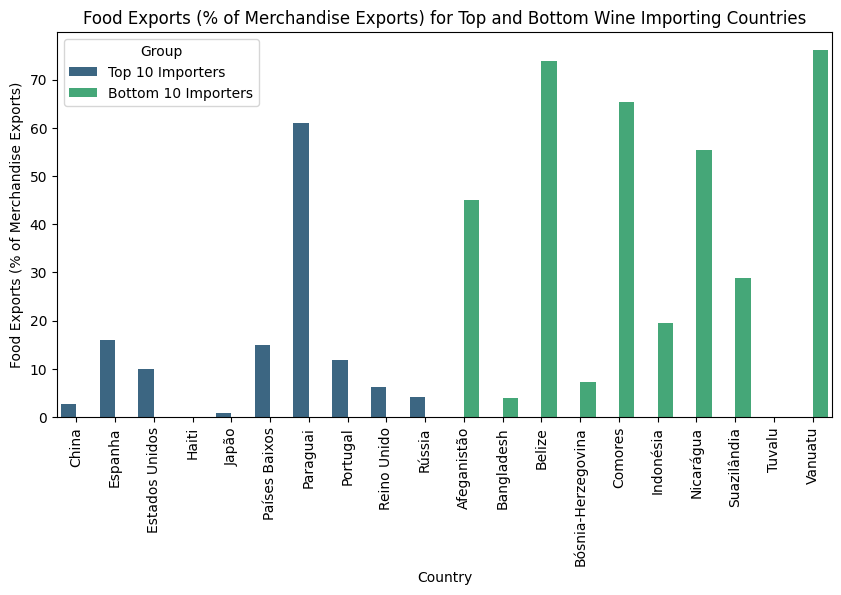

In [117]:
# Filtrar os dados demográficos para apenas os países que estamos interessados
demographics_filtered = dados_demograficos[dados_demograficos['País'].isin(top_10_import['País']) | dados_demograficos['País'].isin(bottom_10_import['País'])]

# Filtrar para apenas a série "Food exports (% of merchandise exports)"
food_exports = demographics_filtered[demographics_filtered['Series Name'] == 'Food exports (% of merchandise exports)']

# Filtrar para apenas os países do top 10 importadores e bottom 10 exportadores
top_10_food_exports = food_exports[food_exports['País'].isin(top_10_import['País'])]
bottom_10_food_exports = food_exports[food_exports['País'].isin(bottom_10_export['País'])]

# Adicionar uma nova coluna ao dataframe
top_10_food_exports['Group'] = 'Top 10 Importers'
bottom_10_food_exports['Group'] = 'Bottom 10 Importers'

# Concatenar os dois dataframes
food_exports_data = pd.concat([top_10_food_exports, bottom_10_food_exports])

# Gerar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x='País', y='Average', hue='Group', data=food_exports_data, palette='viridis')
plt.title('Food Exports (% of Merchandise Exports) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Food Exports (% of Merchandise Exports)')
plt.xticks(rotation=90)
plt.show()


#Nova Análise

In [119]:
import pandas as pd

# Carregar os dados de exportação de vinho por quantidade
exportacao_quantidade = pd.read_excel("exportacao_vinho_quantidade.xlsx")


In [120]:
# Selecionar apenas as colunas de anos
anos_cols = exportacao_quantidade.columns[2:-3]

# Criar uma nova coluna 'Total' que representa a soma das quantidades exportadas em cada ano
exportacao_quantidade['Total'] = exportacao_quantidade[anos_cols].sum(axis=1)


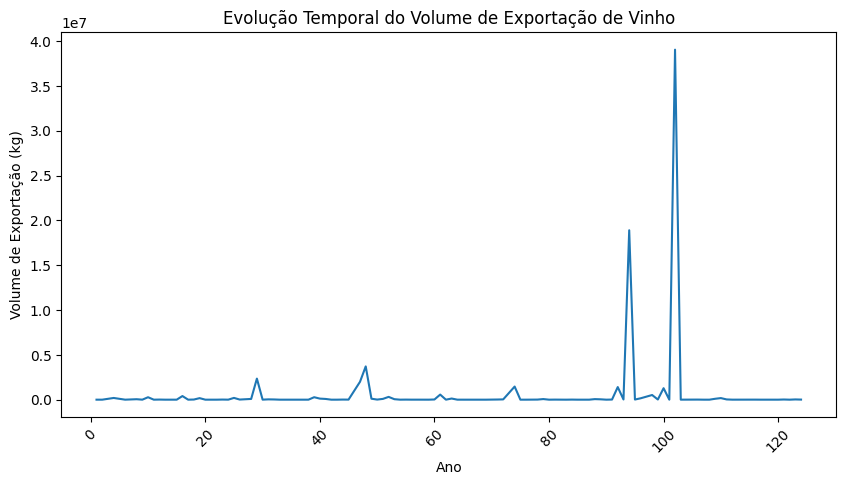

In [121]:
import matplotlib.pyplot as plt

# Gerar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(exportacao_quantidade['Id'], exportacao_quantidade['Total'])
plt.title('Evolução Temporal do Volume de Exportação de Vinho')
plt.xlabel('Ano')
plt.ylabel('Volume de Exportação (kg)')
plt.xticks(rotation=45)
plt.show()


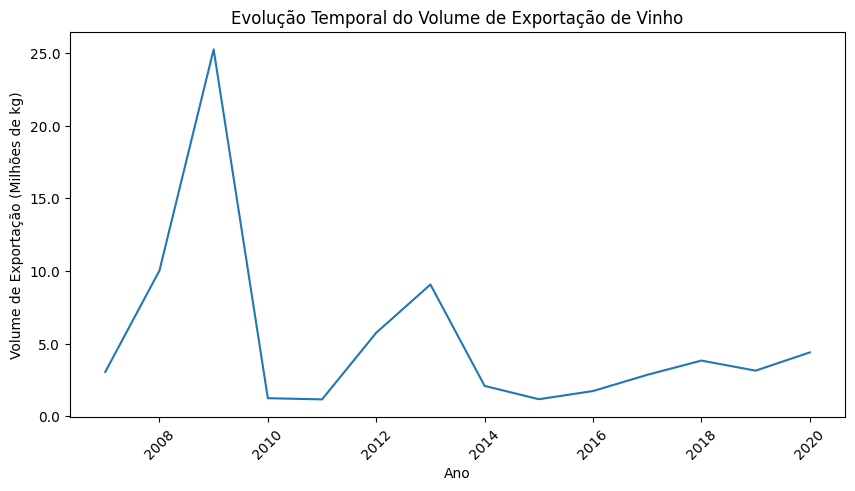

In [125]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Selecionar apenas as colunas de anos
anos_cols = exportacao_quantidade.columns[2:-3]

# Criar uma lista de anos baseada nas colunas selecionadas
anos = [int(col) for col in anos_cols]

# Selecionar o total de exportação correspondente aos anos disponíveis
total_exportacao = exportacao_quantidade.iloc[:, 2:-3].sum(axis=0)

# Gerar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(anos, total_exportacao)
plt.title('Evolução Temporal do Volume de Exportação de Vinho')
plt.xlabel('Ano')
plt.ylabel('Volume de Exportação (Milhões de kg)')

# Definir o formato do eixo y como Milhões
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x/1e6))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.show()
